1600
[0.000e+00 1.000e+00 2.000e+00 ... 1.597e+03 1.598e+03 1.599e+03]
0.0
1.4492317400000072


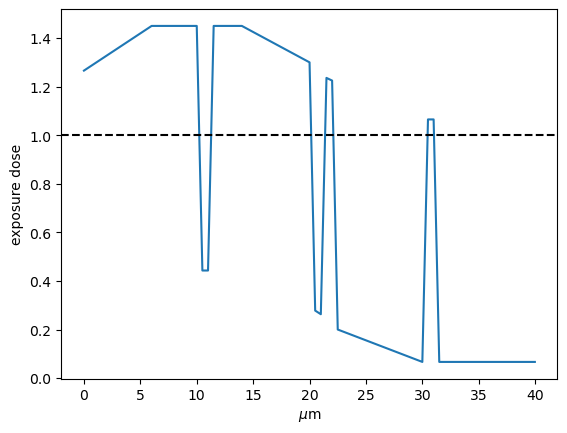

In [108]:
import numpy as np
import matplotlib.pyplot as plt


min_pix_size = 25
width = 40000 #nanometers
pix_width = width/min_pix_size
pix_width = int(pix_width)
print(pix_width)

eta = 0.5 #@50 keV on si
sigma_b = 6000 #@50 keV on si
#r = np.linspace() #Radius
RT = 1 # Resist Threshold 
pixels = np.linspace(0,pix_width-1,pix_width)
micro_meter = pixels *25/1000
D = np.zeros(pix_width)
print(pixels)
D[0] = 1.266
print(D[240])

# Defining uncorrected dose profile

for i in range(pix_width):
    if i < 240:
        D[i+1] = D[i]+ 0.00076666
    if 239 < i < 400:
        D[i+1] = D[i]
    if 399 < i < 420:
        D[i+1] = D[i]-0.05035
        
    if 419 < i < 440:
        D[i+1] = D[i]

    if 439 < i < 460:
        D[i+1] = D[i]+0.05035

    if 459 < i < 560:
        D[i+1] = D[i] 

    if 559 < i < 800:
        D[i+1] = D[i]-0.000625

    if 799 < i < 820:
        D[i+1] = D[i]-0.0511

    if 819 < i < 840:  
        D[i+1] = D[i]-0.00075

    if 839 < i < 860:
        D[i+1] = D[i]+0.04865

    if 859 < i < 880:    
        D[i+1] = D[i]-0.00055
    
    if 879 < i < 900:
       D[i+1] = D[i]-0.05125

    if 899 < i < 1200:
        D[i+1] = D[i]-0.0004445
    
    if 1199 < i < 1220:
        D[i+1] = D[i]+0.04992
    
    if 1219 < i < 1240:
        D[i+1] = D[i]
    
    if 1239 < i < 1260:
        D[i+1] = D[i]-0.04992
    
    if 1259 < i < 1599:
        D[i+1] = D[1260]

print(D[239])
plt.plot(micro_meter,D)
plt.axhline(y = 1.0, color = 'black', linestyle = '--') 
plt.xlabel(r'$\mu$m')
plt.ylabel('exposure dose')
plt.show()
#PB = (eta/sigma_b**2) * np.exp(-np.abs(r**2)/sigma_b**2)






1600


<Figure size 640x480 with 0 Axes>

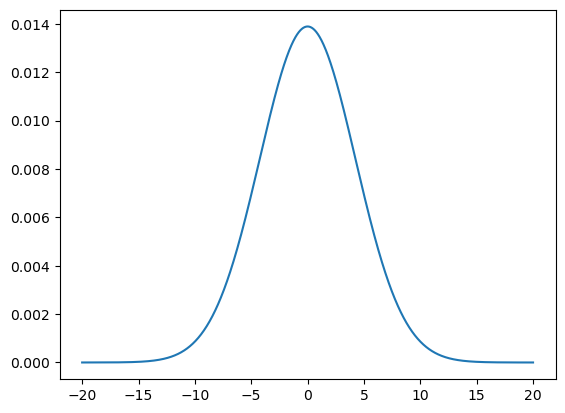

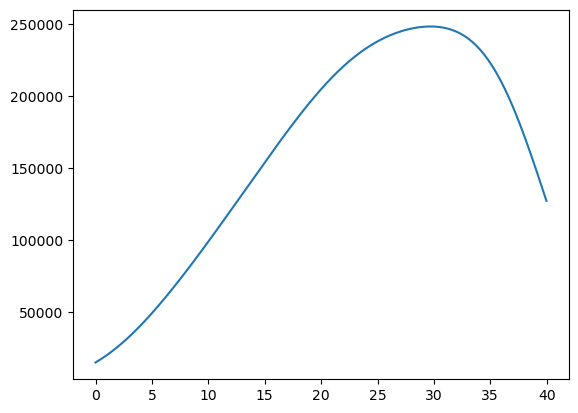

<Figure size 640x480 with 0 Axes>

In [156]:
# Creating corrected dose profile 

eta = 0.5 #@50 keV on si
sigma_b = 6 #@50 keV on si
l = (width-1)/1000
r = np.linspace(-l/2,l/2,pix_width) #Radius
#r = np.linspace(0,l,pix_width) #Radius

PB = (eta/sigma_b**2) * np.exp(-np.abs(r**2)/(sigma_b**2)) #Point spread function
plt.plot(r,PB)
plt.figure()

con = np.convolve(D,PB,'same')
print(len(con))
plt.plot(micro_meter,con)
plt.figure()


1600


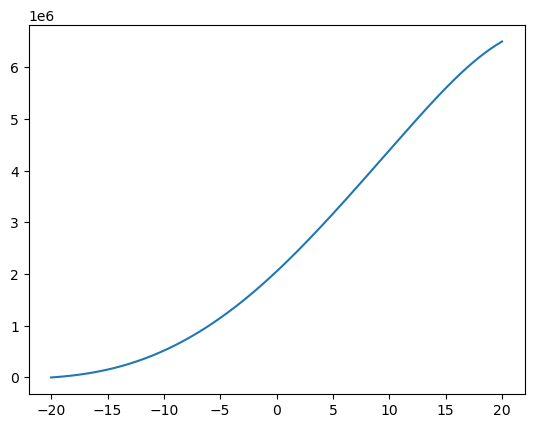

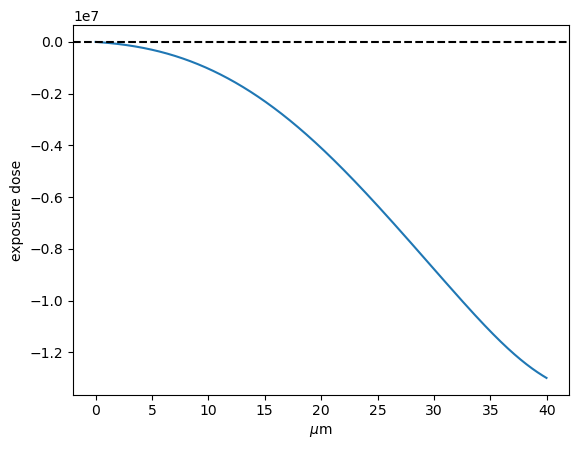

In [160]:
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

integral = cumulative_trapezoid(con,r, initial=0)
print(len(integral))
plt.plot(r, integral)
plt.figure()


D_corr = D
for i in range(pix_width-1):
    D_corr[i+1] = 2*(1 - integral[i])

plt.plot(micro_meter,D_corr)
plt.axhline(y = 1.0, color = 'black', linestyle = '--') 
plt.xlabel(r'$\mu$m')
plt.ylabel('exposure dose')
plt.show()

